# Word2vec 
assess similarity between ST word and TT paraphrases
- read kent auxilliary functions
- read PARA19 dataset
- read google word2vec
- visualize similarity of paraphrases
- regression of similarity values on HTra values

In [1]:
# import kent library
import sys
sys.path.insert(0, '/data/critt/shared/Spring19/')

import kent
import importlib
importlib.reload(kent)

<module 'kent' from '/data/critt/shared/Spring19/kent.py'>

In [2]:
# read all tables of PARA19 study 
STdf = kent.readTPDDBtables(["PARA19/Tables/"], "*st", path = '/data/critt/tprdb/KENT/')
STdf.head()

,Id,STseg,Study,Session,SL,TL,Task,Text,Part,SToken,...,TrtT,InEff,Yawat,Edit,AltT,CountT,ProbT,HTra,HSeg,HCross
0,1,1,PARA19,P01_C1,en,en,C,1,P01,Killer,...,6561,1.14,---,[_]Killer_,5,6,0.4615,1.8920,1.2389,1.8920
1,2,1,PARA19,P01_C1,en,en,C,1,P01,nurse,...,584,1.00,---,nurse_,2,10,0.7692,0.7793,0.7793,1.8230
2,3,1,PARA19,P01_C1,en,en,C,1,P01,receives,...,1695,1.00,---,receives_,6,6,0.4615,2.1416,1.1401,1.8230
3,4,1,PARA19,P01_C1,en,en,C,1,P01,four,...,0,1.40,---,foi[i]ur_,3,7,0.5385,1.4573,0.7793,1.4885
4,5,1,PARA19,P01_C1,en,en,C,1,P01,life,...,2531,1.00,---,life_,2,9,0.6923,0.8905,0.8905,0.8905


In [23]:
STdf[(STdf.Id == 1)][['SToken', 'STseg', 'Text', 'TGroup','HTra']]

,SToken,STseg,Text,TGroup,HTra
9,Norris,2,1,Norris,0.7732
169,families,2,2,families,0.9913
322,gesture,2,3,A_move,1.9143
468,chances,1,4,efforts,1.8920
578,emerged,2,5,---,2.2878
717,.,1,6,---,0.9612
856,families,2,2,families,0.9913
1009,gesture,2,3,gesture,1.9143
1155,chances,1,4,chances,1.8920
1265,emerged,2,5,began,2.2878


In [25]:
H['hospital']

['---',
 'hospital_staff',
 'hospital_staff_may_have_considered',
 'the_hospital',
 'hospital']

In [ ]:
# print out ST item together with set of aligned items
# Id iterates through all words in a Text.
# Since each text is worked on my multiple participants, each Stoken could have multiple TGroup entries.
# Our aim is to print all Tgroups as a list for each SToken
# H is dictionary with key: SToken and value: List of TGroup
H = {} # dictionary with Stoken as key and its corresponding Tgroup as List value
for txt in set(STdf["Text"]) :
    print("Text:{}".format(txt))
    for idx in set(STdf["Id"]) :
        word = STdf[(STdf["Text"] == txt) & (STdf["Id"] == idx)]
        if word.empty : continue

        sl = list(set(word["SToken"].str.lower()))[0]
        tl = list(set(word["TGroup"].str.lower()))
        ss = str(sl)
        ts = str(tl)
        print("{:10}\t{:10}".format(ss, ts))
        
        # keep source word and list of paraphrases in dictionary
        H[sl] = tl


In [12]:
# load pre-compiled google word2vec models 
from gensim.models import KeyedVectors
#filename = '/data/critt/shared/Spring19/w2v/GoogleNews-vectors-negative300.bin'
filename = '/data/critt/shared/Spring19/w2v/glove/glove.6B.200d.word2vec.txt'
modelGV = KeyedVectors.load_word2vec_format(filename, binary=False)

In [57]:
modelGV.vocab['nath']

In [70]:
modelGV.similarity('paris','mumbai')

0.36867458

In [13]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# compute w2v similartity for each column 
# s: source word
# P: list of target phrases
# check whether word and paraphrases are in word2vec vocabulary
def inVocab(s, P):
    L = [s] # initialize list with source word
    
    # loop over target phrases
    for ph in P :
        mx = 0 # value of most similar word
        b = '---'
        
        # check whether paraphrase is in vocabulary
        for w in ph.split('_'):
            # check whether paraphrase is in vocabulary 
            if w in modelGV.vocab : 
                m = modelGV.similarity(w1=s, w2=w)
                if m > mx : 
                    mx = m
                    b = w
        if b != '---' : L.append(b)
               
    return list(set(L))

# produce a list of synonyms that are in word2vec vocabulary
source_target_map = {}
synonyms = []
for s in H:
    if not s in modelGV : continue
    L = inVocab(s, H[s])
    if len(L) < 2: continue
    synonyms.append(L)
    source_target_map[s] = L


In [7]:
# words and their synonyms
for k in source_target_map:
    if len(source_target_map[k]) >= 4 :
        print(f"{k}\t\t{source_target_map[k]}")

killer		['nurse', 'killing', 'death', 'killer']
receives		['receives', 'awarded', 'received', 'recieved', 'gets']
killing		['killing', 'death', 'killings', 'killed', 'killer']
large		['much', 'doses', 'high', 'them', 'large']
amounts		['amount', 'much', 'doses', 'causing', 'amounts']
a		['therefore', 'hence', 'problems', 'a', 'thus']
killings		['killing', 'murders', 'killings', 'kill', 'crimes']
least		['less', 'very', 'which', 'least']
awareness		['detected', 'this', 'her', 'of', 'awareness']
stop		['end', 'caught', 'stop', 'reported']
disliked		['disliked', 'aversion', 'hatred', 'like', 'did']
considered		['felt', 'considered', 'thought', 'as']
hit		['affected', 'impact', 'affects', 'hit']
increase		['especially', 'decrease', 'increasing', 'increase']
cost		['costs', 'prices', 'cost', 'inflation']
cough		['cough', 'come', 'increased', 'spend', 'pay', 'costing']
extra		['extra', 'boost', 'put', 'implement', 'going']
£		['31,300', '£', '$', 'pounds', 'euros']
as		['therefore', 'hence',

In [8]:
#synonyms[:10]

# task: extract lists with 4 or more different paraphrasesa
para = [s for s in synonyms if len(s) >= 4 ]

In [9]:
para

[['nurse', 'killing', 'death', 'killer'],
 ['receives', 'awarded', 'received', 'recieved', 'gets'],
 ['killing', 'death', 'killings', 'killed', 'killer'],
 ['much', 'doses', 'high', 'them', 'large'],
 ['amount', 'much', 'doses', 'causing', 'amounts'],
 ['therefore', 'hence', 'problems', 'a', 'thus'],
 ['killing', 'murders', 'killings', 'kill', 'crimes'],
 ['less', 'very', 'which', 'least'],
 ['detected', 'this', 'her', 'of', 'awareness'],
 ['end', 'caught', 'stop', 'reported'],
 ['disliked', 'aversion', 'hatred', 'like', 'did'],
 ['felt', 'considered', 'thought', 'as'],
 ['affected', 'impact', 'affects', 'hit'],
 ['especially', 'decrease', 'increasing', 'increase'],
 ['costs', 'prices', 'cost', 'inflation'],
 ['cough', 'come', 'increased', 'spend', 'pay', 'costing'],
 ['extra', 'boost', 'put', 'implement', 'going'],
 ['31,300', '£', '$', 'pounds', 'euros'],
 ['therefore', 'hence', 'as', 'problems', 'thus'],
 ['prices', 'price', 'inflation', 'pricing'],
 ['soar', 'rising', 'raise', 'inc

In [71]:
words = [w for l in synonyms[3:7] for w in l]

In [72]:
words

['sentences',
 'sentence',
 'he',
 'norris',
 'nurse',
 'which',
 'was',
 'imprisoned',
 'convicted']

In [73]:
modelGV[words]

array([[ 0.54507 ,  0.25362 , -0.31453 , ..., -0.6103  ,  0.058629,
         0.43395 ],
       [ 0.63646 ,  0.04405 , -0.023881, ..., -0.75886 ,  0.23176 ,
         0.050506],
       [ 0.10278 , -0.037982, -0.34679 , ...,  0.34194 ,  0.23397 ,
        -0.045398],
       ...,
       [-0.1996  , -0.27529 , -0.21257 , ..., -0.26509 , -0.14119 ,
         0.013857],
       [-0.32589 , -0.057608, -0.39012 , ..., -0.50585 ,  0.26081 ,
         0.26147 ],
       [-0.10723 , -0.24811 , -0.61608 , ..., -0.70579 , -0.079285,
         0.1494  ]], dtype=float32)

In [81]:
result

array([[ 4.4814253 , -0.58191407],
       [ 3.922916  , -0.8343576 ],
       [-2.3813972 , -2.4429443 ],
       [-2.9483137 ,  2.7840312 ],
       [-2.277333  ,  3.2019827 ],
       [-2.3566523 , -2.5125751 ],
       [-2.2896097 , -2.1777618 ],
       [ 1.200723  ,  1.4734781 ],
       [ 2.6482403 ,  1.0900632 ]], dtype=float32)

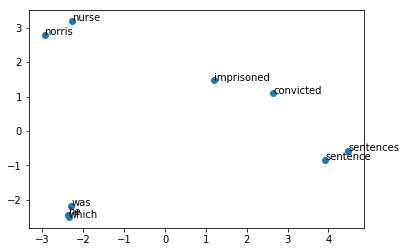

In [79]:
# visualize proximity of words and paraphrases

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


words = [w for l in synonyms[3:7] for w in l]

# extract smaller model 
X = modelGV[words]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [11]:
# sort HTra value

STdf[["Id","Task","Part","SToken","TGroup","HTra"]].sort_values(by="HTra", ascending=False).head(20)

,Id,Task,Part,SToken,TGroup,HTra
9116,56,U,P11,embarrass,embarass,2.8074
3297,56,U,P04,embarrass,recieved,2.8074
9824,56,H,P12,embarrass,embarassing,2.8074
4742,56,H,P06,embarrass,humiliate,2.8074
10532,56,H,P13,embarrass,embarrass,2.8074
6137,56,C,P08,embarrass,embrass,2.8074
4034,56,U,P05,embarrass,embarrass,2.8074
1749,56,C,P03,embarrass,embarrass,2.8074
5450,56,H,P07,embarrass,embarrass_China,2.8074
368,56,H,P01,embarrass,is_sure_to_embarrass_China,2.8074


#### Compute max similarity score (WV) for each SToken using Glove w2v and add to a column WV to ST table

In [12]:
# compute max w2v similartity for each ST word and add "WV" column
E = []

# loop through the STdf table
for idx in STdf.index :
    mx = 0 # initialize word similarity value with 0
    
    # get ST word and lower-case
    s = str(STdf.iloc[idx]["SToken"]).lower()
    
    # check whether word in the vocabulary
    if s not in modelGV.vocab : 
        E.append(mx) # set similarity to 0
        continue

    # get tt equivalent
    tt = str(STdf.iloc[idx]["TGroup"]).lower()
    # transform into a list of words
    TL = tt.split('_')
    
    for t in TL:
        # check whether t word is in the vocabulary
        if t in modelGV.vocab : 
            m = modelGV.similarity(w1=s, w2=t)
            # keep max 
            if m > mx : mx = m
                
    # keep similarity value in an array
    E.append(mx)

print(len(E))
STdf["WV"] = E


11011


In [51]:
E

[1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0000001,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.14818056,
 1.0,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0000001,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0000001,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000001,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 0.99999994,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000001,
 1.0,
 0.99999994,
 1.0,
 1.0,
 0.99999994,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999

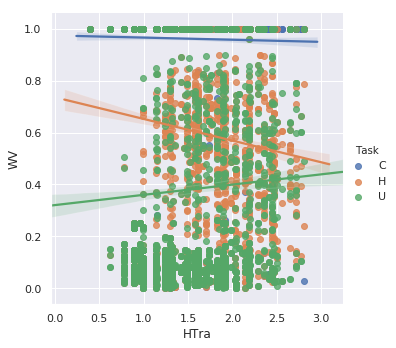

            WV      HTra
WV    1.000000 -0.015421
HTra -0.015421  1.000000 
 Ttest_indResult(statistic=-137.5641051112654, pvalue=0.0) 



In [39]:
#https://seaborn.pydata.org/tutorial/regression.html
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#D = STdf[(STdf.WV > 0) & (STdf.Task == "C") & (STdf.Part == "P05") | (STdf.Part == "P08") | (STdf.Part == "P13")]
D = STdf[(STdf.WV > 0)]
C = D.query('Part == "P13" or Part == "P05" or Part =="P08"')
# Tasks: check regression analysis for different values of:
# properties of differen tasks: copying, paraphrasing, summarization
# properties of different participants: P01 ... P13
# properties of different texts: 1 ... 6
# --> generate 


sns.set(color_codes=True)
sns.lmplot(x="HTra", y="WV", hue="Task", data=D) #, x_estimator=np.mean
plt.show()

print(D[["WV", "HTra"]].corr(), "\n",
      stats.ttest_ind(D["WV"], D["HTra"]),"\n")


/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


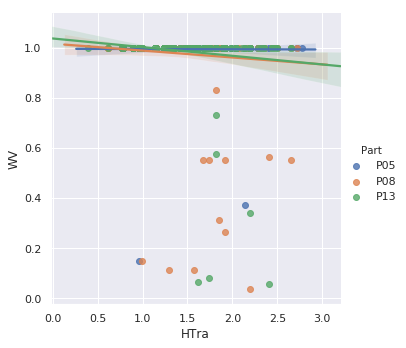

In [41]:
#C = D.query('Part == "P13" or Part == "P05" or Part =="P08"')
# Tasks: check regression analysis for different values of:
# properties of differen tasks: copying, paraphrasing, summarization
# properties of different participants: P01 ... P13
# properties of different texts: 1 ... 6
# --> generate 

M = C[(C.Task == "C")]
sns.set(color_codes=True)
sns.lmplot(x="HTra", y="WV", hue="Part", data=M) #, x_estimator=np.mean
plt.show()

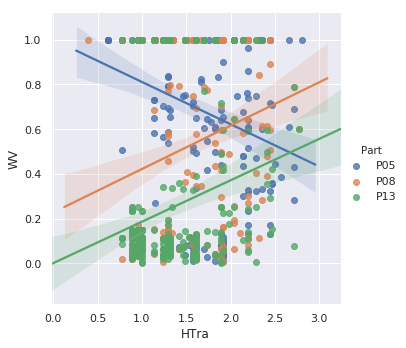

In [42]:
M = C[(C.Task == "U")]
sns.set(color_codes=True)
sns.lmplot(x="HTra", y="WV", hue="Part", data=M) #, x_estimator=np.mean
plt.show()

In [50]:
WV

NameError: name 'WV' is not defined

/usr/local/lib64/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


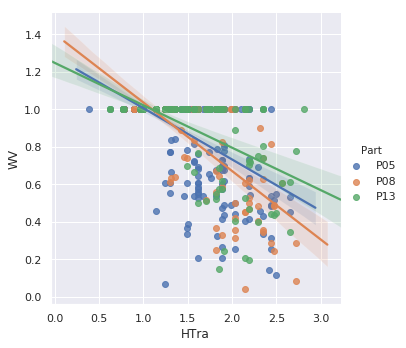

In [49]:
M = C[(C.Task == "H") & (C.TGroup != "---")]
sns.set(color_codes=True)
sns.lmplot(x="HTra", y="WV", hue="Part", data=M) #, x_estimator=np.mean
plt.show()

In [14]:
import pandas as pd
from statsmodels.formula.api import ols

model = ols("WV ~ HTra * Task", data=D)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WV   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     170.6
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          5.60e-122
Time:                        17:46:14   Log-Likelihood:                -165.84
No. Observations:                 774   AIC:                             343.7
Df Residuals:                     768   BIC:                             371.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.0371      0.061     17.091      0.000       0.918       1.156
Task[T.H]         -0.3363      0.092     -3.645      0.000      -0.517      -0.155
Task[T.U]         -1.0358      0.088    -11.801      0.000      -1.208      -0.863
HTra              -0.0345      0.040     -0.872      0.384      -0.112       0.043
HTra:Task[T.H]    -0.0902      0.057     -1.578      0.115      -0.202       0.022
HTra:Task[T.U]     0.2196      0.058      3.760      0.000       0.105       0.334
==============================================================================
Omnibus:                       38.042   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.747
Skew:                           0.536   Prob(JB):                     5.22e-10
Kurtosis:                       3.418   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Some other packages to test correlation and p values

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(D["WV"], D["HTra"])
stats.linregress(D["WV"], D["HTra"])

LinregressResult(slope=0.012027991767402033, intercept=1.4868740372116063, rvalue=0.011315891411743561, pvalue=0.7532787399122147, stderr=0.038253210769808595)

In [20]:
from scipy import stats

#stats.ttest_ind(STdf["WV"], STdf["HTra"])
print(STdf[["WV", "HTra","HCross","Dur"]].corr(), "\n", stats.ttest_ind(STdf["WV"], STdf["HTra"]))


KeyError: "['WV'] not in index"

In [17]:
from numpy import mean
from numpy import var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [77]:
result1 = modelGV.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
result2 = modelGV.most_similar(positive=['woman', 'boy'], negative=['man'], topn=1)
result3 = modelGV.most_similar(positive=['woman', 'son'], negative=['man'], topn=1)
print(result1)
print(result2)
print(result3)

[('queen', 0.6978678703308105)]
[('girl', 0.869331955909729)]
[('daughter', 0.8827179670333862)]


## generate word2vec models in gensim
- load nltk books
- generate models

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.book import *
import nltk
#data = []
#articles = [nltk.book.text1, nltk.book.text2, nltk.book.text3,nltk.book.text4, nltk.book.text6, nltk.book.text7,nltk.book.text8]
data = kent.NLTKbooks2Sent([nltk.book.text1, nltk.book.text2, nltk.book.text3,nltk.book.text4, nltk.book.text6, nltk.book.text7,nltk.book.text8])
#for article in articles: 
for i in sent_tokenize(' '.join(data)): 
    temp = []       
    # tokenize the sentence into words 
    for j in word_tokenize(i): temp.append(j.lower()) 
    data.append(temp) 

#d[:20]
#if ("dog" in data): print("dog")

In [16]:
# load NLTK books and transform into a list of sentences
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.book import *
articles = kent.NLTKbooks2Sent([text1, text2, text3,text4, text6, text7,text8])

In [74]:
len(articles)

28106

In [17]:
# generate word2vec models
import gensim 
from gensim.models import Word2Vec 
import nltk
from nltk.book import *

# Create CBOW model 
model1 = gensim.models.Word2Vec(articles, min_count = 1, size = 100, window = 5) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(articles, min_count = 1, size = 100, window = 5, sg = 1) 

In [19]:
model1.wv.save_word2vec_format('nltk_w2v.txt',binary=False)

In [75]:
len(model1.wv.vocab)

33140

In [25]:
source_target_map

{'killer': ['nurse', 'killing', 'death', 'killer'],
 'receives': ['receives', 'awarded', 'received', 'recieved', 'gets'],
 'four': ['4', 'four'],
 'sentences': ['sentence', 'sentences'],
 'norris': ['norris', 'he', 'nurse'],
 'was': ['was', 'which'],
 'imprisoned': ['convicted', 'imprisoned'],
 'the': ['able', 'it', 'the'],
 'killing': ['killing', 'death', 'killings', 'killed', 'killer'],
 'his': ['s', 'his', 'he'],
 'old': ['old', 'elderly'],
 'from': ['of', 'from'],
 'by': ['for', 'by', 'under'],
 'giving': ['them', 'giving', 'administration'],
 'them': ['them', 'these', 'those'],
 'large': ['much', 'doses', 'high', 'them', 'large'],
 'amounts': ['amount', 'much', 'doses', 'causing', 'amounts'],
 'medicine': ['medicine', 'medication', 'pills'],
 ',': [',', 'specialized'],
 'he': ['norris', 'his', 'he'],
 'found': ['found', 'given'],
 'counts': ['deaths', 'counts'],
 'murder': ['murder', 'deaths'],
 'following': ['end', 'following', 'after'],
 'a': ['therefore', 'hence', 'problems', '

In [24]:
import gensim 
from gensim.models import Word2Vec 

  
# Print results 
print("Cosine similarity between 'dog' " + "and 'cat' - CBOW : ", 
    model1.wv.similarity('dog', 'cat')) 
      
print("Cosine similarity between 'dog' " + "and 'machines' - CBOW : ", 
      model1.wv.similarity('dog', 'machines')) 

# Print results 
print("Cosine similarity between 'dog' " + "and 'cat' - Skip Gram : ", 
    model2.wv.similarity('dog', 'cat')) 
      
print("Cosine similarity between 'dog' " +  "and 'machines' - Skip Gram : ", 
      model2.wv.similarity('dog', 'machines')) 


Cosine similarity between 'dog' and 'cat' - CBOW :  0.7286636
Cosine similarity between 'dog' and 'machines' - CBOW :  -0.26033238
Cosine similarity between 'dog' and 'cat' - Skip Gram :  0.8167601
Cosine similarity between 'dog' and 'machines' - Skip Gram :  0.7797615


In [34]:
for k in source_target_map:
    values = source_target_map[k]
    print(f"Similarity for {k} :\n\n")
    for value in values:
        try:
            print(f"Cosine similarity between {k} and {value} - CBOW : ", 
              model1.wv.similarity(k, value))
        except(KeyError):
            print(f"No match in CBOW for word {k} and {value}")
    print("\n\n")
    

Similarity for killer :


Cosine similarity between killer and nurse - CBOW :  0.8859941
Cosine similarity between killer and killing - CBOW :  0.8013206
Cosine similarity between killer and death - CBOW :  0.85520893
Cosine similarity between killer and killer - CBOW :  1.0



Similarity for receives :


Cosine similarity between receives and receives - CBOW :  1.0
Cosine similarity between receives and awarded - CBOW :  0.7559622
Cosine similarity between receives and received - CBOW :  0.7387585
No match in CBOW for word receives
Cosine similarity between receives and gets - CBOW :  0.8702338



Similarity for four :


Cosine similarity between four and 4 - CBOW :  0.8183577
Cosine similarity between four and four - CBOW :  1.0



Similarity for sentences :


Cosine similarity between sentences and sentence - CBOW :  0.6510013
Cosine similarity between sentences and sentences - CBOW :  1.0



Similarity for norris :


No match in CBOW for word norris
No match in CBOW for word norris




Similarity for which :


Cosine similarity between which and including - CBOW :  0.49479884
Cosine similarity between which and which - CBOW :  0.99999994
Cosine similarity between which and a - CBOW :  0.5974644



Similarity for has :


Cosine similarity between has and its - CBOW :  0.280299
Cosine similarity between has and is - CBOW :  0.5555908
Cosine similarity between has and has - CBOW :  0.99999994



Similarity for sought :


Cosine similarity between sought and out - CBOW :  0.7251639
Cosine similarity between sought and tried - CBOW :  0.87963676
Cosine similarity between sought and sought - CBOW :  1.0
Cosine similarity between sought and trying - CBOW :  0.94891906
Cosine similarity between sought and thought - CBOW :  0.6637694



Similarity for halt :


Cosine similarity between halt and halt - CBOW :  0.99999994
Cosine similarity between halt and stop - CBOW :  0.86127824
Cosine similarity between halt and to - CBOW :  0.48511195



Similarity for negative :


Cosi

Cosine similarity between relatively and emerging - CBOW :  0.8097238



Similarity for new :


Cosine similarity between new and new - CBOW :  1.0
Cosine similarity between new and young - CBOW :  0.8373565



Similarity for academic :


Cosine similarity between academic and study - CBOW :  0.86630297
Cosine similarity between academic and discipline - CBOW :  0.68141735
Cosine similarity between academic and academics - CBOW :  0.73425746
Cosine similarity between academic and academic - CBOW :  0.99999994
Cosine similarity between academic and school - CBOW :  0.78043574
No match in CBOW for word academic



Similarity for discipline :


Cosine similarity between discipline and of - CBOW :  0.55293983
Cosine similarity between discipline and field - CBOW :  0.8774615
Cosine similarity between discipline and study - CBOW :  0.8977211
Cosine similarity between discipline and discipline - CBOW :  1.0



Similarity for emerged :


Cosine similarity between emerged and began - CBOW :  0

Cosine similarity between than and than - CBOW :  1.0



Similarity for land :


Cosine similarity between land and land - CBOW :  1.0
Cosine similarity between land and the - CBOW :  0.70724475



Similarity for left :


Cosine similarity between left and left - CBOW :  1.0
Cosine similarity between left and the - CBOW :  0.62834525



Similarity for non :


Cosine similarity between non and lack - CBOW :  0.8352043
Cosine similarity between non and not - CBOW :  0.16342255
Cosine similarity between non and non - CBOW :  1.0
Cosine similarity between non and support - CBOW :  0.7196947



Similarity for hierarchical :


Cosine similarity between hierarchical and non - CBOW :  -0.46816745
No match in CBOW for word hierarchical
No match in CBOW for word hierarchical
Cosine similarity between hierarchical and hierarchical - CBOW :  1.0
No match in CBOW for word hierarchical



Similarity for structures :


Cosine similarity between structures and structure - CBOW :  0.94615835
Cosine sim

In [35]:
for k in source_target_map:
    values = source_target_map[k]
    print(f"Similarity for {k} :\n\n")
    for value in values:
        try:
            print(f"Cosine similarity between {k} and {value} - Skip Gram : ", 
              model2.wv.similarity(k, value))
        except(KeyError):
            print(f"No match in Skip-Gram for word {k} and {value}")
    print("\n\n")
    

Similarity for killer :


Cosine similarity between killer and nurse - Skip Gram :  0.9605332
Cosine similarity between killer and killing - Skip Gram :  0.96822566
Cosine similarity between killer and death - Skip Gram :  0.8164537
Cosine similarity between killer and killer - Skip Gram :  1.0000001



Similarity for receives :


Cosine similarity between receives and receives - Skip Gram :  1.0000001
Cosine similarity between receives and awarded - Skip Gram :  0.96615386
Cosine similarity between receives and received - Skip Gram :  0.7723656
No match in Skip-Gram for word receives and recieved
Cosine similarity between receives and gets - Skip Gram :  0.9435129



Similarity for four :


Cosine similarity between four and 4 - Skip Gram :  0.62397814
Cosine similarity between four and four - Skip Gram :  1.0



Similarity for sentences :


Cosine similarity between sentences and sentence - Skip Gram :  0.94794625
Cosine similarity between sentences and sentences - Skip Gram :  1.0



Cosine similarity between set and set - Skip Gram :  1.0
Cosine similarity between set and to - Skip Gram :  0.5140471
Cosine similarity between set and this - Skip Gram :  0.5601356



Similarity for embarrass :


No match in Skip-Gram for word embarrass and embarass
No match in Skip-Gram for word embarrass and embarras
No match in Skip-Gram for word embarrass and humiliate
No match in Skip-Gram for word embarrass and embarrass
No match in Skip-Gram for word embarrass and embarassing



Similarity for which :


Cosine similarity between which and including - Skip Gram :  0.53017443
Cosine similarity between which and which - Skip Gram :  1.0
Cosine similarity between which and a - Skip Gram :  0.35637915



Similarity for has :


Cosine similarity between has and its - Skip Gram :  0.38758862
Cosine similarity between has and is - Skip Gram :  0.56994075
Cosine similarity between has and has - Skip Gram :  1.0



Similarity for sought :


Cosine similarity between sought and out - Ski

Cosine similarity between achieving and achieving - Skip Gram :  1.0
Cosine similarity between achieving and improve - Skip Gram :  0.88303334
Cosine similarity between achieving and focusing - Skip Gram :  0.9848111



Similarity for better :


Cosine similarity between better and improving - Skip Gram :  0.77733314
Cosine similarity between better and increased - Skip Gram :  0.6504755
Cosine similarity between better and boost - Skip Gram :  0.636594
Cosine similarity between better and better - Skip Gram :  0.99999994
Cosine similarity between better and improve - Skip Gram :  0.7667217



Similarity for standards :


Cosine similarity between standards and well - Skip Gram :  0.62946045
Cosine similarity between standards and quality - Skip Gram :  0.88324827
Cosine similarity between standards and standards - Skip Gram :  1.0
Cosine similarity between standards and standard - Skip Gram :  0.9148435



Similarity for poor :


Cosine similarity between poor and citizens - Skip Gram

## Stanford pre-compiled w2v models
- load stanford word2vec models

In [ ]:
# convert stanford word2vec int gensim (does not need to be repeated)
#from gensim.scripts.glove2word2vec import glove2word2vec
#glove_input_file = '/data/critt/shared/Spring19/w2v/glove/glove.6B.50d.txt'
#word2vec_output_file = '/data/critt/shared/Spring19/w2v/glove/glove.6B.50d.word2vec.txt'
#glove2word2vec(glove_input_file, word2vec_output_file)

In [28]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/data/critt/shared/Spring19/w2v/glove/glove.6B.300d.word2vec.txt'
modelSF = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = modelSF.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.6713277101516724)]


## Entropy ##

$ H = -\sum p(e). log_2 (p(e))$

Max_entropy = $log_2 (n)$

Entropy is the expected value of every possible information.

It is the total number of bits in which the whole information can be represented

In [45]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/data/critt/shared/Spring19/w2v/glove/glove.6B.100d.word2vec.txt'
modelSF100 = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = modelSF100.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7698541283607483)]


In [ ]:
result = modelSF100.most_similar(positive=source_target_map['killer'], negative=None, topn=5)
print(result)

In [ ]:
source_target_map

In [ ]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/data/critt/shared/Spring19/w2v/glove/glove.6B.200d.word2vec.txt'
modelSF200 = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = modelSF200.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

In [101]:
similarity_list = []
results = []
similarity_list.append(['woman','king','man'])
similarity_list.append(['woman','boy','man'])
similarity_list.append(['woman','son','man'])
similarity_list.append(['paris','italy','france'])
similarity_list.append(['paris','germany','france'])
for ll in similarity_list:
    result = modelGV.most_similar(positive=[ll[0], ll[1]], negative=[ll[2]], topn=1)
    results.append(result[0][0])
    print(f"{ll[2]}:{ll[0]} = {ll[1]}: {result[0]}")

man:woman = king: ('queen', 0.6978678703308105)
man:woman = boy: ('girl', 0.869331955909729)
man:woman = son: ('daughter', 0.8827179670333862)
france:paris = italy: ('rome', 0.758540689945221)
france:paris = germany: ('berlin', 0.8416252732276917)


In [ ]:
# Task:
# compare similarities of stanford, google, nltk 
# generate models with lemmatized texts

In [94]:
[w for wl in similarity_list for w in wl]

['woman',
 'king',
 'man',
 'woman',
 'boy',
 'man',
 'woman',
 'son',
 'man',
 'paris',
 'italy',
 'france',
 'paris',
 'germany',
 'france']

In [ ]:
# visualize proximity of words and paraphrases

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot


words = set([w for wl in similarity_list for w in wl])
words = words.union(set(results))

# extract smaller model 
X = modelGV[words]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()